11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
469/469 [==============================] - 64s 134ms/step - loss: 0.1710 - val_loss: 0.1125
Epoch 2/10
469/469 [==============================] - 54s 114ms/step - loss: 0.1112 - val_loss: 0.1088
Epoch 3/10
469/469 [==============================] - 53s 113ms/step - loss: 0.1087 - val_loss: 0.1071
Epoch 4/10
469/469 [==============================] - 54s 116ms/step - loss: 0.1073 - val_loss: 0.1058
Epoch 5/10
469/469 [==============================] - 54s 115ms/step - loss: 0.1060 - val_loss: 0.1046
Epoch 6/10
469/469 [==============================] - 53s 112ms/step - loss: 0.1048 - val_loss: 0.1036
Epoch 7/10
469/469 [==============================] - 53s 113ms/step - loss: 0.1039 - val_loss: 0.1028
Epoch 8/10
469/469 [==============================] - 53s 112ms/step - loss: 0.1032 - val_loss: 0.1022
Epoch 9/10
469/469 [==============================] - 54s 115ms/step - loss: 0.1027 - val_loss: 0.1018
Epoch 10

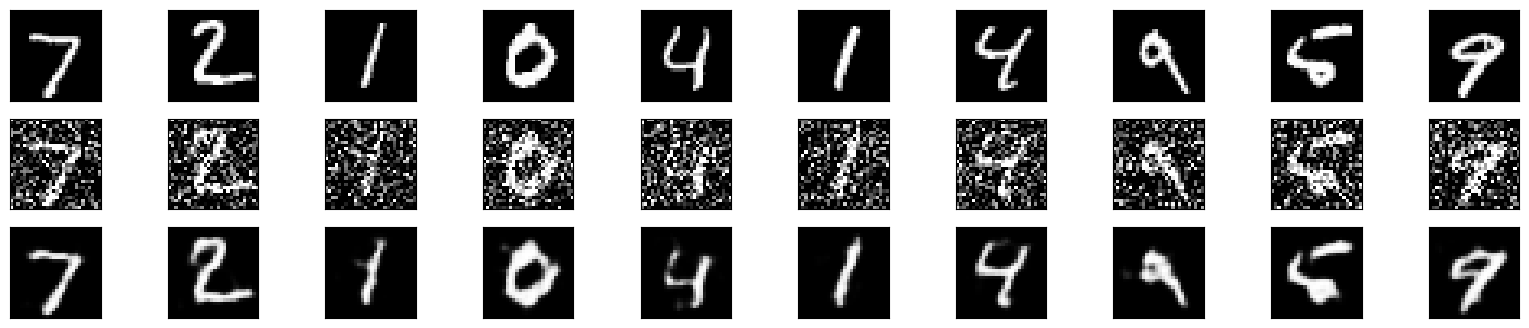

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Generate synthetic noisy images
def generate_noisy_images(data, noise_factor=0.5):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    return np.clip(noisy_data, 0., 1.)

# Build autoencoder model
# Build autoencoder model with upsampling in the decoder
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)
    encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    encoded = MaxPooling2D((2, 2), padding='same')(encoded)

    decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    decoded = UpSampling2D((2, 2))(decoded)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder


# Load dataset (e.g., MNIST)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Add noise to images
x_train_noisy = generate_noisy_images(x_train)
x_test_noisy = generate_noisy_images(x_test)

# Build and train the autoencoder
autoencoder = build_autoencoder(input_shape=(28, 28, 1))
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

# Denoise images
denoised_images = autoencoder.predict(x_test_noisy)

# Visualize original, noisy, and denoised images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

